# Problem Title  - PRCP-1017-AutoPricePred- Automobile Imports Price Prediction

## Aim- The target is to predict the price of the cars.

## Domain Understanding

The dataset consists of 200 records and 26 columns. It seems to be related to automobiles, potentially focusing on characteristics like fuel type, engine specifications, body type, and price. Here’s a brief overview based on the provided data:

1. The dataset has mixed data types: numeric (e.g., dimensions, horsepower, and price) and categorical (e.g., fuel type, body style).
2. Some columns have unclear names or missing values (e.g., the column "?" or unusual entries).
3. The dataset likely includes features such as:
Vehicle specifications (e.g., engine type, fuel type, horsepower).
Dimensions and weight.
Performance metrics (e.g., mileage, RPM).
Price and categorical characteristics (e.g., body style, drivetrain).
4. Here’s a detailed explanation of the dataset features after renaming:

<b>Symboling:</b>

A categorical variable representing the insurance risk rating of the car.
Values typically range from -3 (safe) to +3 (risky), where higher values indicate higher risk.

<b>Normalized Losses:</b>

Represents the relative average loss payment per insured vehicle year.
Higher values may correlate with higher repair costs or accident risks.
Contains missing or questionable values ("?"), which need cleaning.

<b>Make:</b>

The manufacturer or brand of the car (e.g., Alfa-Romeo, Audi).
Categorical data indicating the company producing the automobile.

<b>Fuel Type:</b>

Indicates the type of fuel the car uses, typically "gas" or "diesel".
Useful for analyzing fuel efficiency and environmental impact.

<b>Aspiration:</b>

Specifies whether the engine uses a turbocharger ("turbo") or is naturally aspirated ("std").
Turbocharged engines often provide better performance but may affect maintenance costs.

<b>Number of Doors:</b>

Indicates the number of doors on the vehicle (e.g., two, four).
Reflects vehicle design and functionality.

<b>Body Style:</b>

Describes the type of car design (e.g., convertible, sedan, hatchback).
Important for categorizing vehicles by usage and market segment.

<b>Drive Wheels:</b>

Describes the drivetrain configuration (e.g., "fwd" for front-wheel drive, "rwd" for rear-wheel drive, "4wd" for four-wheel drive).
Affects vehicle handling and performance under different conditions.

<b>Engine Location:</b>

Indicates whether the engine is positioned at the front or rear of the vehicle.
Impacts vehicle dynamics and space utilization.

<b>Wheel Base:</b>

The distance between the front and rear axles of the vehicle, measured in inches.
Larger wheelbases can enhance stability and passenger comfort.

<b>Length:</b>

The total length of the car, measured in inches.
Affects parking, design, and interior space.

<b>Width:</b>

The width of the car, measured in inches.
Influences cabin space and aerodynamics.

<b>Height:</b>

The height of the car, measured in inches.
Affects headroom and aerodynamics.

<b>Curb Weight:</b>

The weight of the car without passengers or cargo, measured in pounds.
Impacts fuel efficiency, handling, and performance.

<b>Engine Type:</b>

The type of engine configuration (e.g., "dohc", "ohc", "rotor").
Important for understanding the car's performance and maintenance requirements.

<b>Number of Cylinders:</b>

The number of engine cylinders (e.g., four, six, eight).
Reflects engine capacity and power output.

<b>Engine Size:</b>

The displacement volume of the engine, measured in cubic centimeters (cc).
Larger engine sizes typically provide more power but may reduce fuel efficiency.

<b>Fuel System:</b>

Indicates the fuel delivery system (e.g., "mpfi" for multi-point fuel injection).
Impacts engine efficiency and emissions.

<b>Bore:</b>

The diameter of the engine cylinder, measured in inches.
Affects engine capacity and power generation.

<b>Stroke:</b>

The distance the piston travels within the cylinder, measured in inches.
Combined with bore, determines engine displacement.

<b>Compression Ratio:</b>

The ratio of the cylinder volume before and after compression.
Higher ratios indicate more efficient combustion but may require higher-octane fuel.

<b>Horsepower:</b>

The maximum power output of the engine, typically measured in HP.
A key indicator of vehicle performance.

<b>Peak RPM:</b>

The engine speed at which maximum horsepower is achieved, measured in revolutions per minute.
Affects acceleration and top speed.

<b>City MPG:</b>

The fuel efficiency of the car when driven in city conditions, measured in miles per gallon.
Lower values indicate higher fuel consumption.

<b>Highway MPG:</b>

The fuel efficiency of the car on highways, measured in miles per gallon.
Usually higher than city MPG due to steady speeds.

<b>Price:</b>

The market price of the car in dollars.
Target variable in many analyses, especially for predicting car prices based on features.

   





 ### Step 1: Import Libraries

In [142]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier


In [143]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [144]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Step 2: Load Dataset

In [146]:
df = pd.read_csv("auto_imports.csv")

In [147]:
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


### Step 3: Rename Columns for Clarity

In [149]:
df.columns = [
    "symboling", "normalized_losses", "make", "fuel_type", "aspiration", 
    "num_doors", "body_style", "drive_wheels", "engine_location", 
    "wheel_base", "length", "width", "height", "curb_weight", 
    "engine_type", "num_cylinders", "engine_size", "fuel_system", 
    "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm", 
    "city_mpg", "highway_mpg", "price"
]

In [150]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [151]:
df.shape

(200, 26)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized_losses  200 non-null    object 
 2   make               200 non-null    object 
 3   fuel_type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num_doors          200 non-null    object 
 6   body_style         200 non-null    object 
 7   drive_wheels       200 non-null    object 
 8   engine_location    200 non-null    object 
 9   wheel_base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb_weight        200 non-null    int64  
 14  engine_type        200 non-null    object 
 15  num_cylinders      200 non-null    object 
 16  engine_size        200 non

In [153]:
df.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [154]:
df.describe()


,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,98.848000,174.228000,65.898000,53.791500,2555.705000,126.860000,10.170100,25.200000,30.705000,13205.690000
std,1.248557,6.038261,12.347132,2.102904,2.428449,518.594552,41.650501,4.014163,6.432487,6.827227,7966.982558
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.675000,64.175000,52.000000,2163.000000,97.750000,8.575000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000,10270.000000
75%,2.000000,102.400000,183.500000,66.675000,55.525000,2928.250000,142.000000,9.400000,30.000000,34.000000,16500.750000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


### Step 4: Data Cleaning

In [156]:
# Replace '?' with NaN for handling missing data
df.replace("?", np.nan, inplace=True)

In [157]:
# Convert numeric columns to proper types
df[["normalized_losses", "bore", "stroke", "horsepower", "peak_rpm", "price"]] = \
    df[["normalized_losses", "bore", "stroke", "horsepower", "peak_rpm", "price"]].astype(float)

### *Datatype of each column*


In [159]:
df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

### Step 6: Exploratory Data Analysis (EDA)

In [161]:
## Univariate Analysis
# Visualizing distributions of numeric features
numeric_features = ["normalized_losses", "wheel_base", "length", "width", "height", "curb_weight", "engine_size", "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]

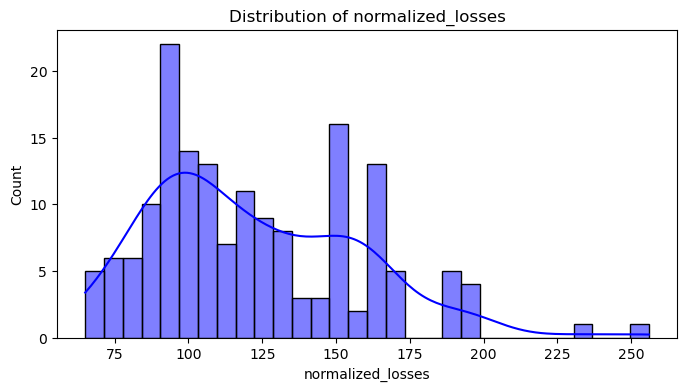

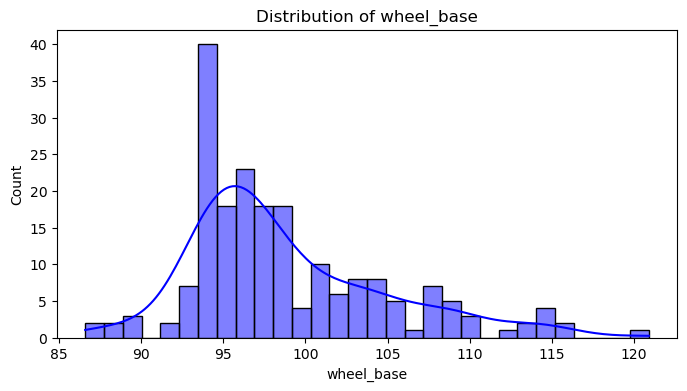

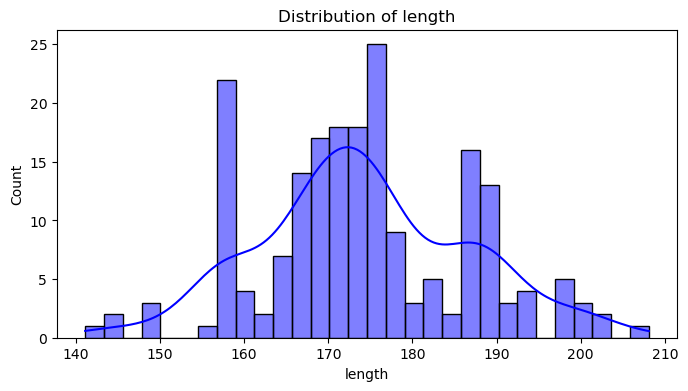

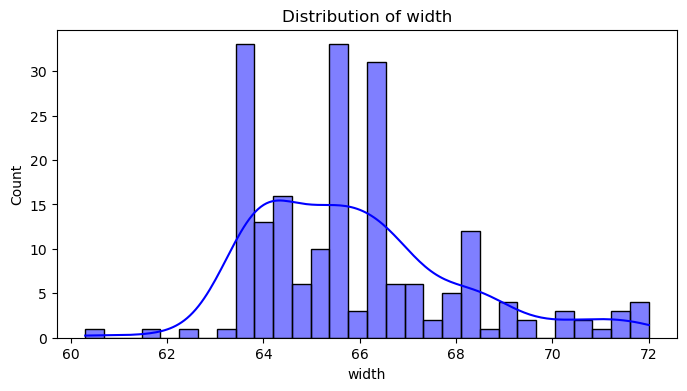

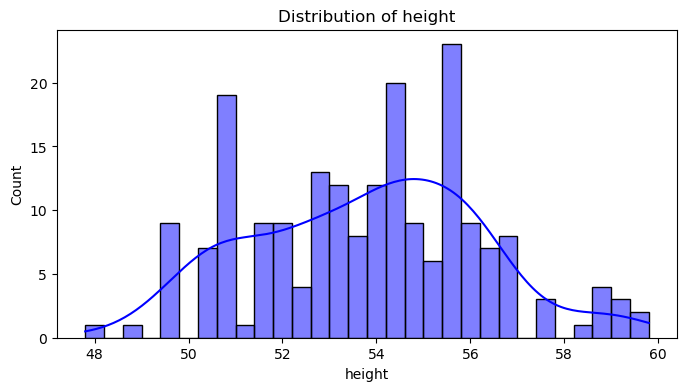

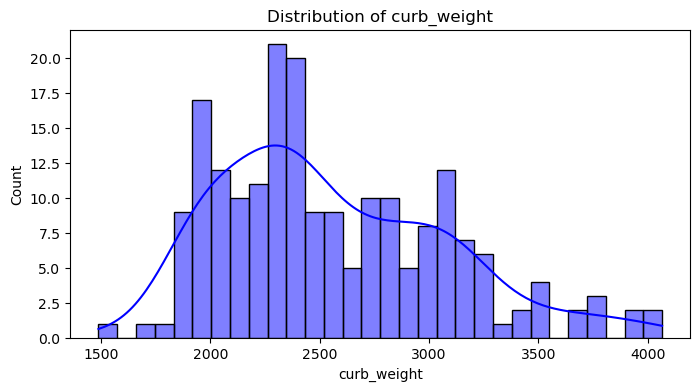

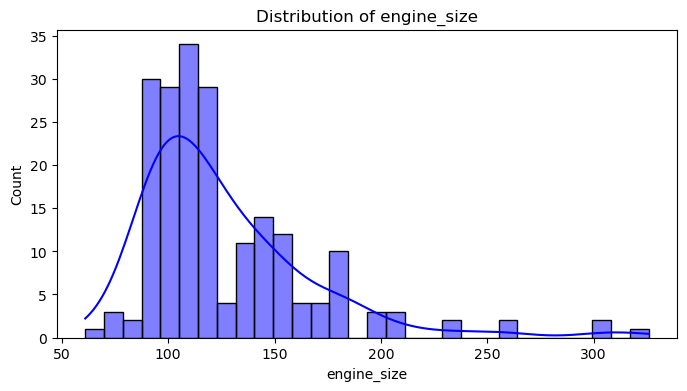

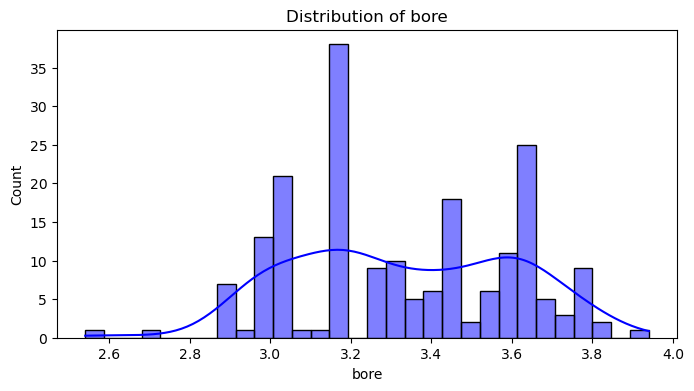

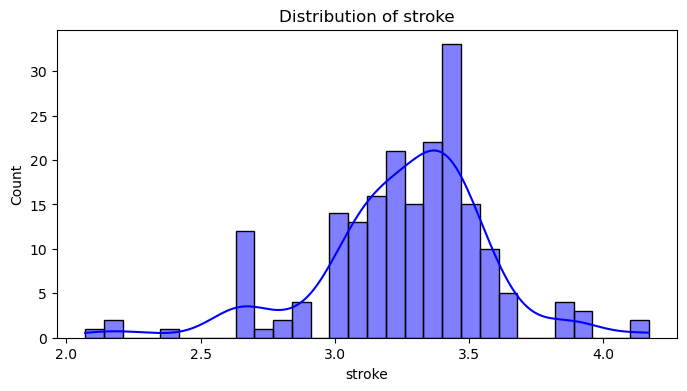

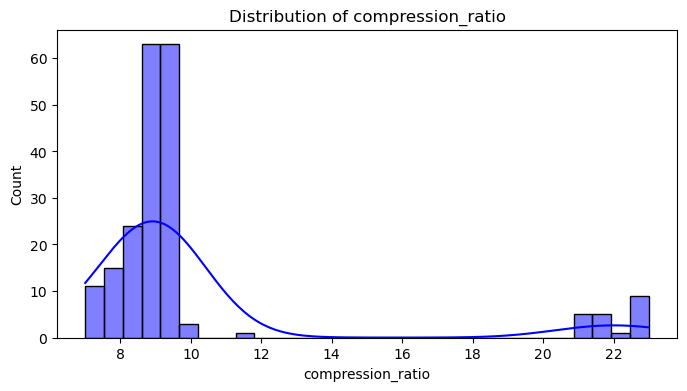

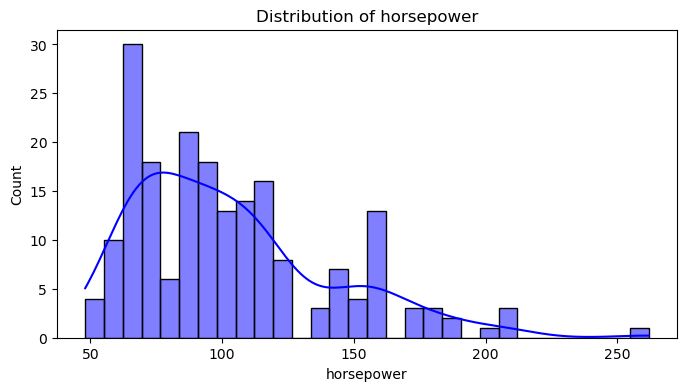

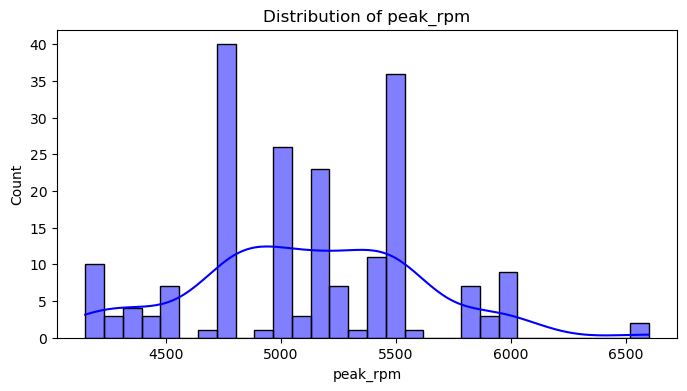

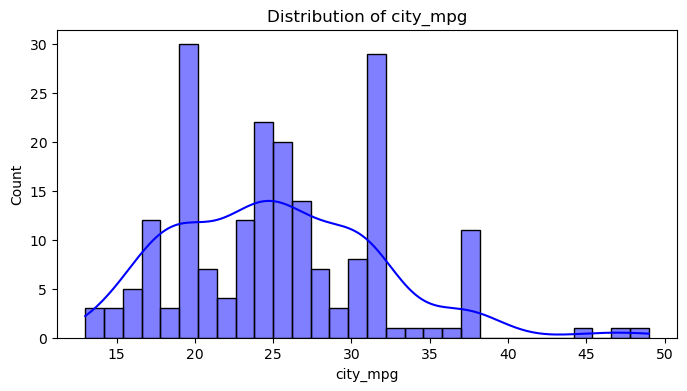

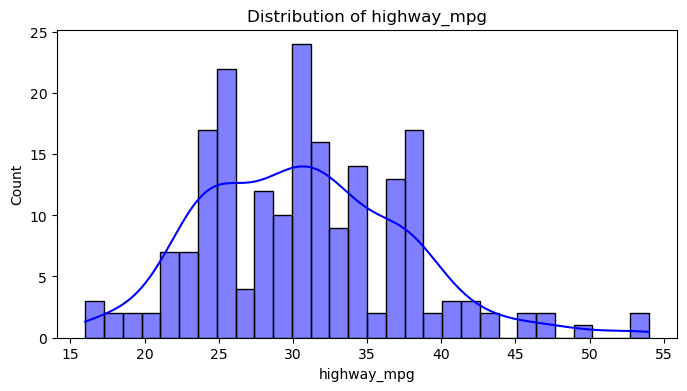

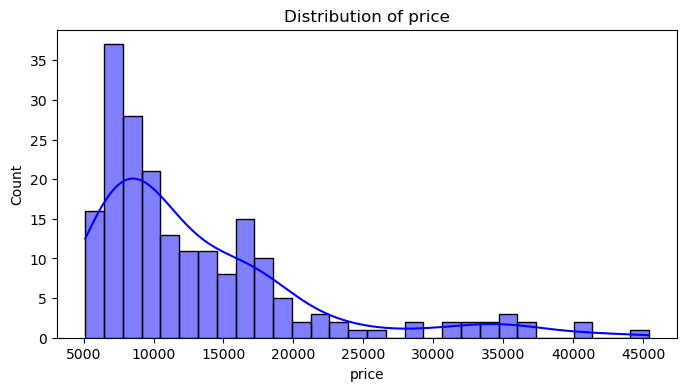

In [162]:
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {feature}")
    plt.show()

                   symboling  normalized_losses  wheel_base    length  \
symboling           1.000000           0.518388   -0.520465 -0.336217   
normalized_losses   0.518388           1.000000   -0.064001  0.029114   
wheel_base         -0.520465          -0.064001    1.000000  0.871968   
length             -0.336217           0.029114    0.871968  1.000000   
width              -0.219850           0.104857    0.815935  0.839184   
height             -0.473994          -0.417081    0.558764  0.505156   
curb_weight        -0.252372           0.122860    0.810507  0.870355   
engine_size        -0.110238           0.203841    0.650488  0.726666   
bore               -0.257013          -0.036167    0.580484  0.649059   
stroke             -0.020539           0.065627    0.164012  0.116049   
compression_ratio  -0.139022          -0.129971    0.293968  0.188968   
horsepower         -0.003669           0.290906    0.514507  0.666726   
peak_rpm            0.199798           0.240676   -

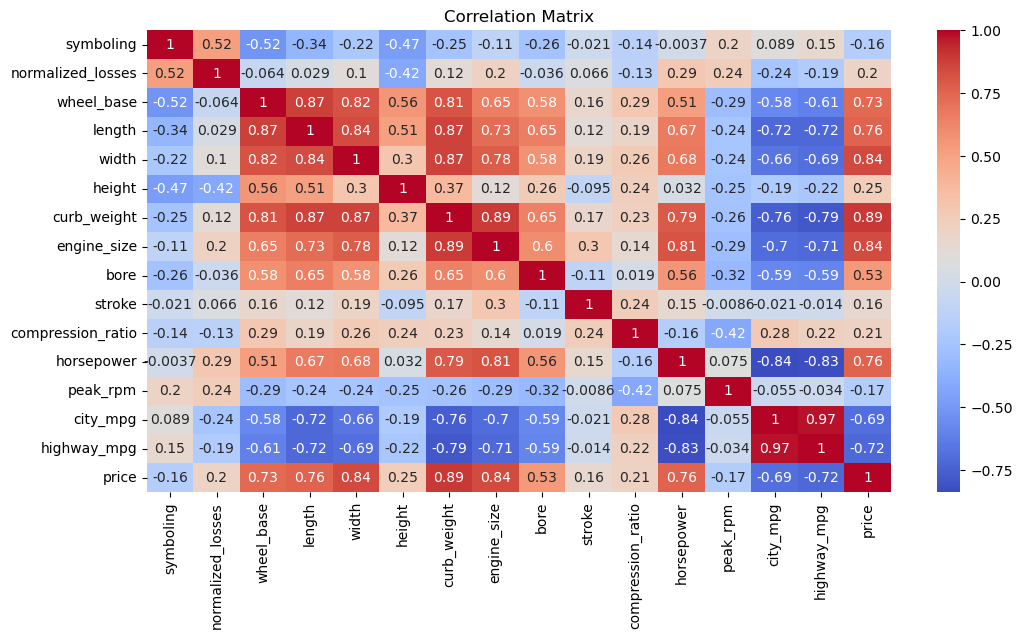

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns and handle NaN values
numeric_data = df.select_dtypes(include=['number']).dropna()

# Check correlation matrix
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

# Plot heatmap if the matrix is not empty
if not correlation_matrix.empty:
    plt.figure(figsize=(12, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
    plt.title("Correlation Matrix")
    plt.show()
else:
    print("Correlation matrix is empty. Ensure valid numeric data.")


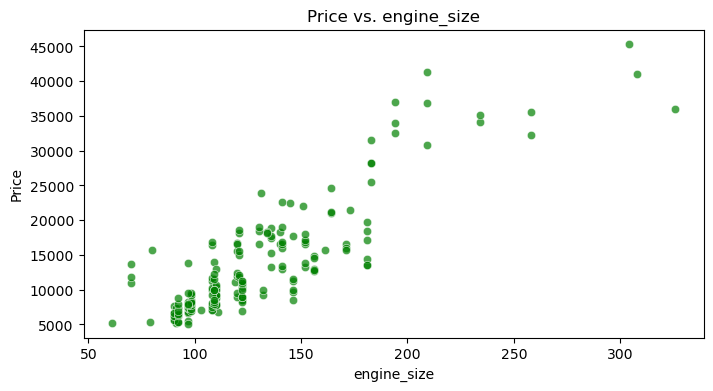

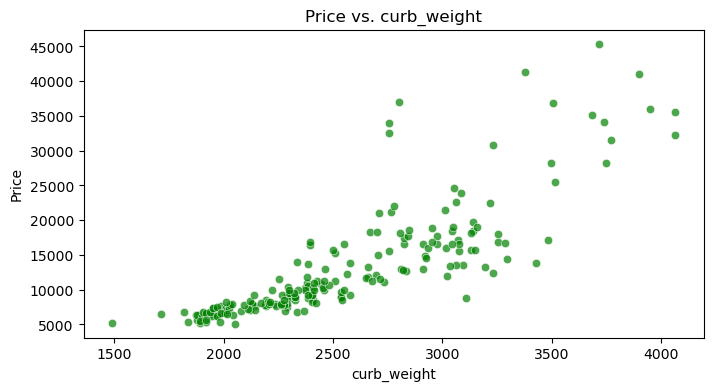

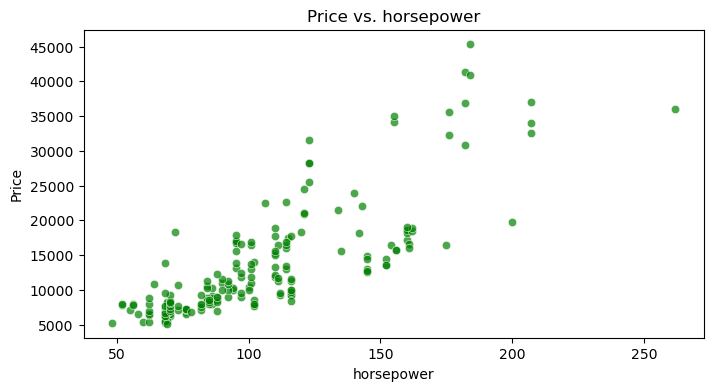

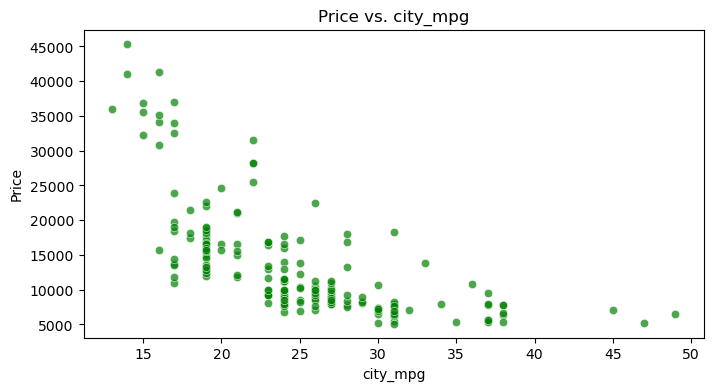

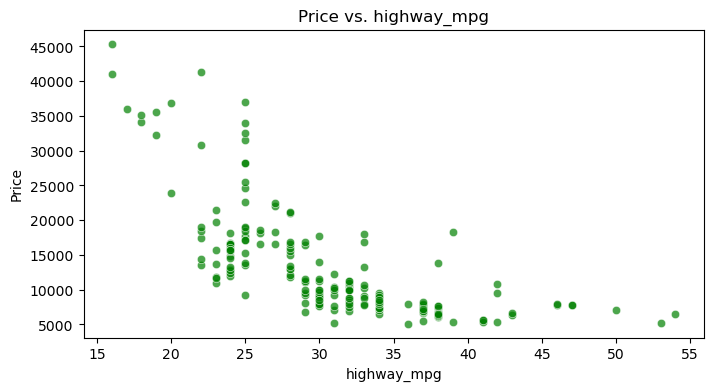

In [164]:
# Scatterplots for key features vs. price
key_features = ["engine_size", "curb_weight", "horsepower", "city_mpg", "highway_mpg"]
for feature in key_features:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=df[feature], y=df["price"], alpha=0.7, color='green')
    plt.title(f"Price vs. {feature}")
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.show()

### *Outlier Detection*

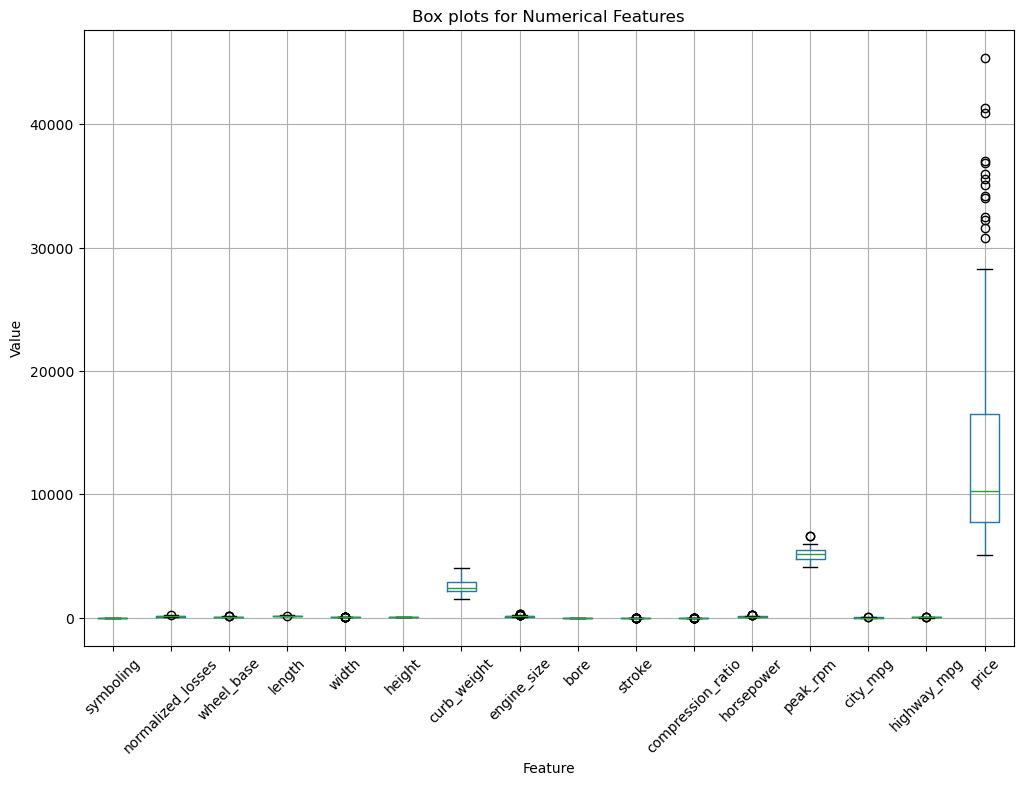

In [166]:
numerical_cols = df.select_dtypes(include=['int', 'float']).columns
plt.figure(figsize=(12, 8))
df[numerical_cols].boxplot()
plt.xticks(rotation=45)
plt.title('Box plots for Numerical Features')
plt.ylabel('Value')
plt.xlabel('Feature')
plt.show()

### Step 7: Handle Outliers

In [168]:
# Using the IQR method to remove outliers for numeric features
for feature in numeric_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

### *Pairplot for all the data*

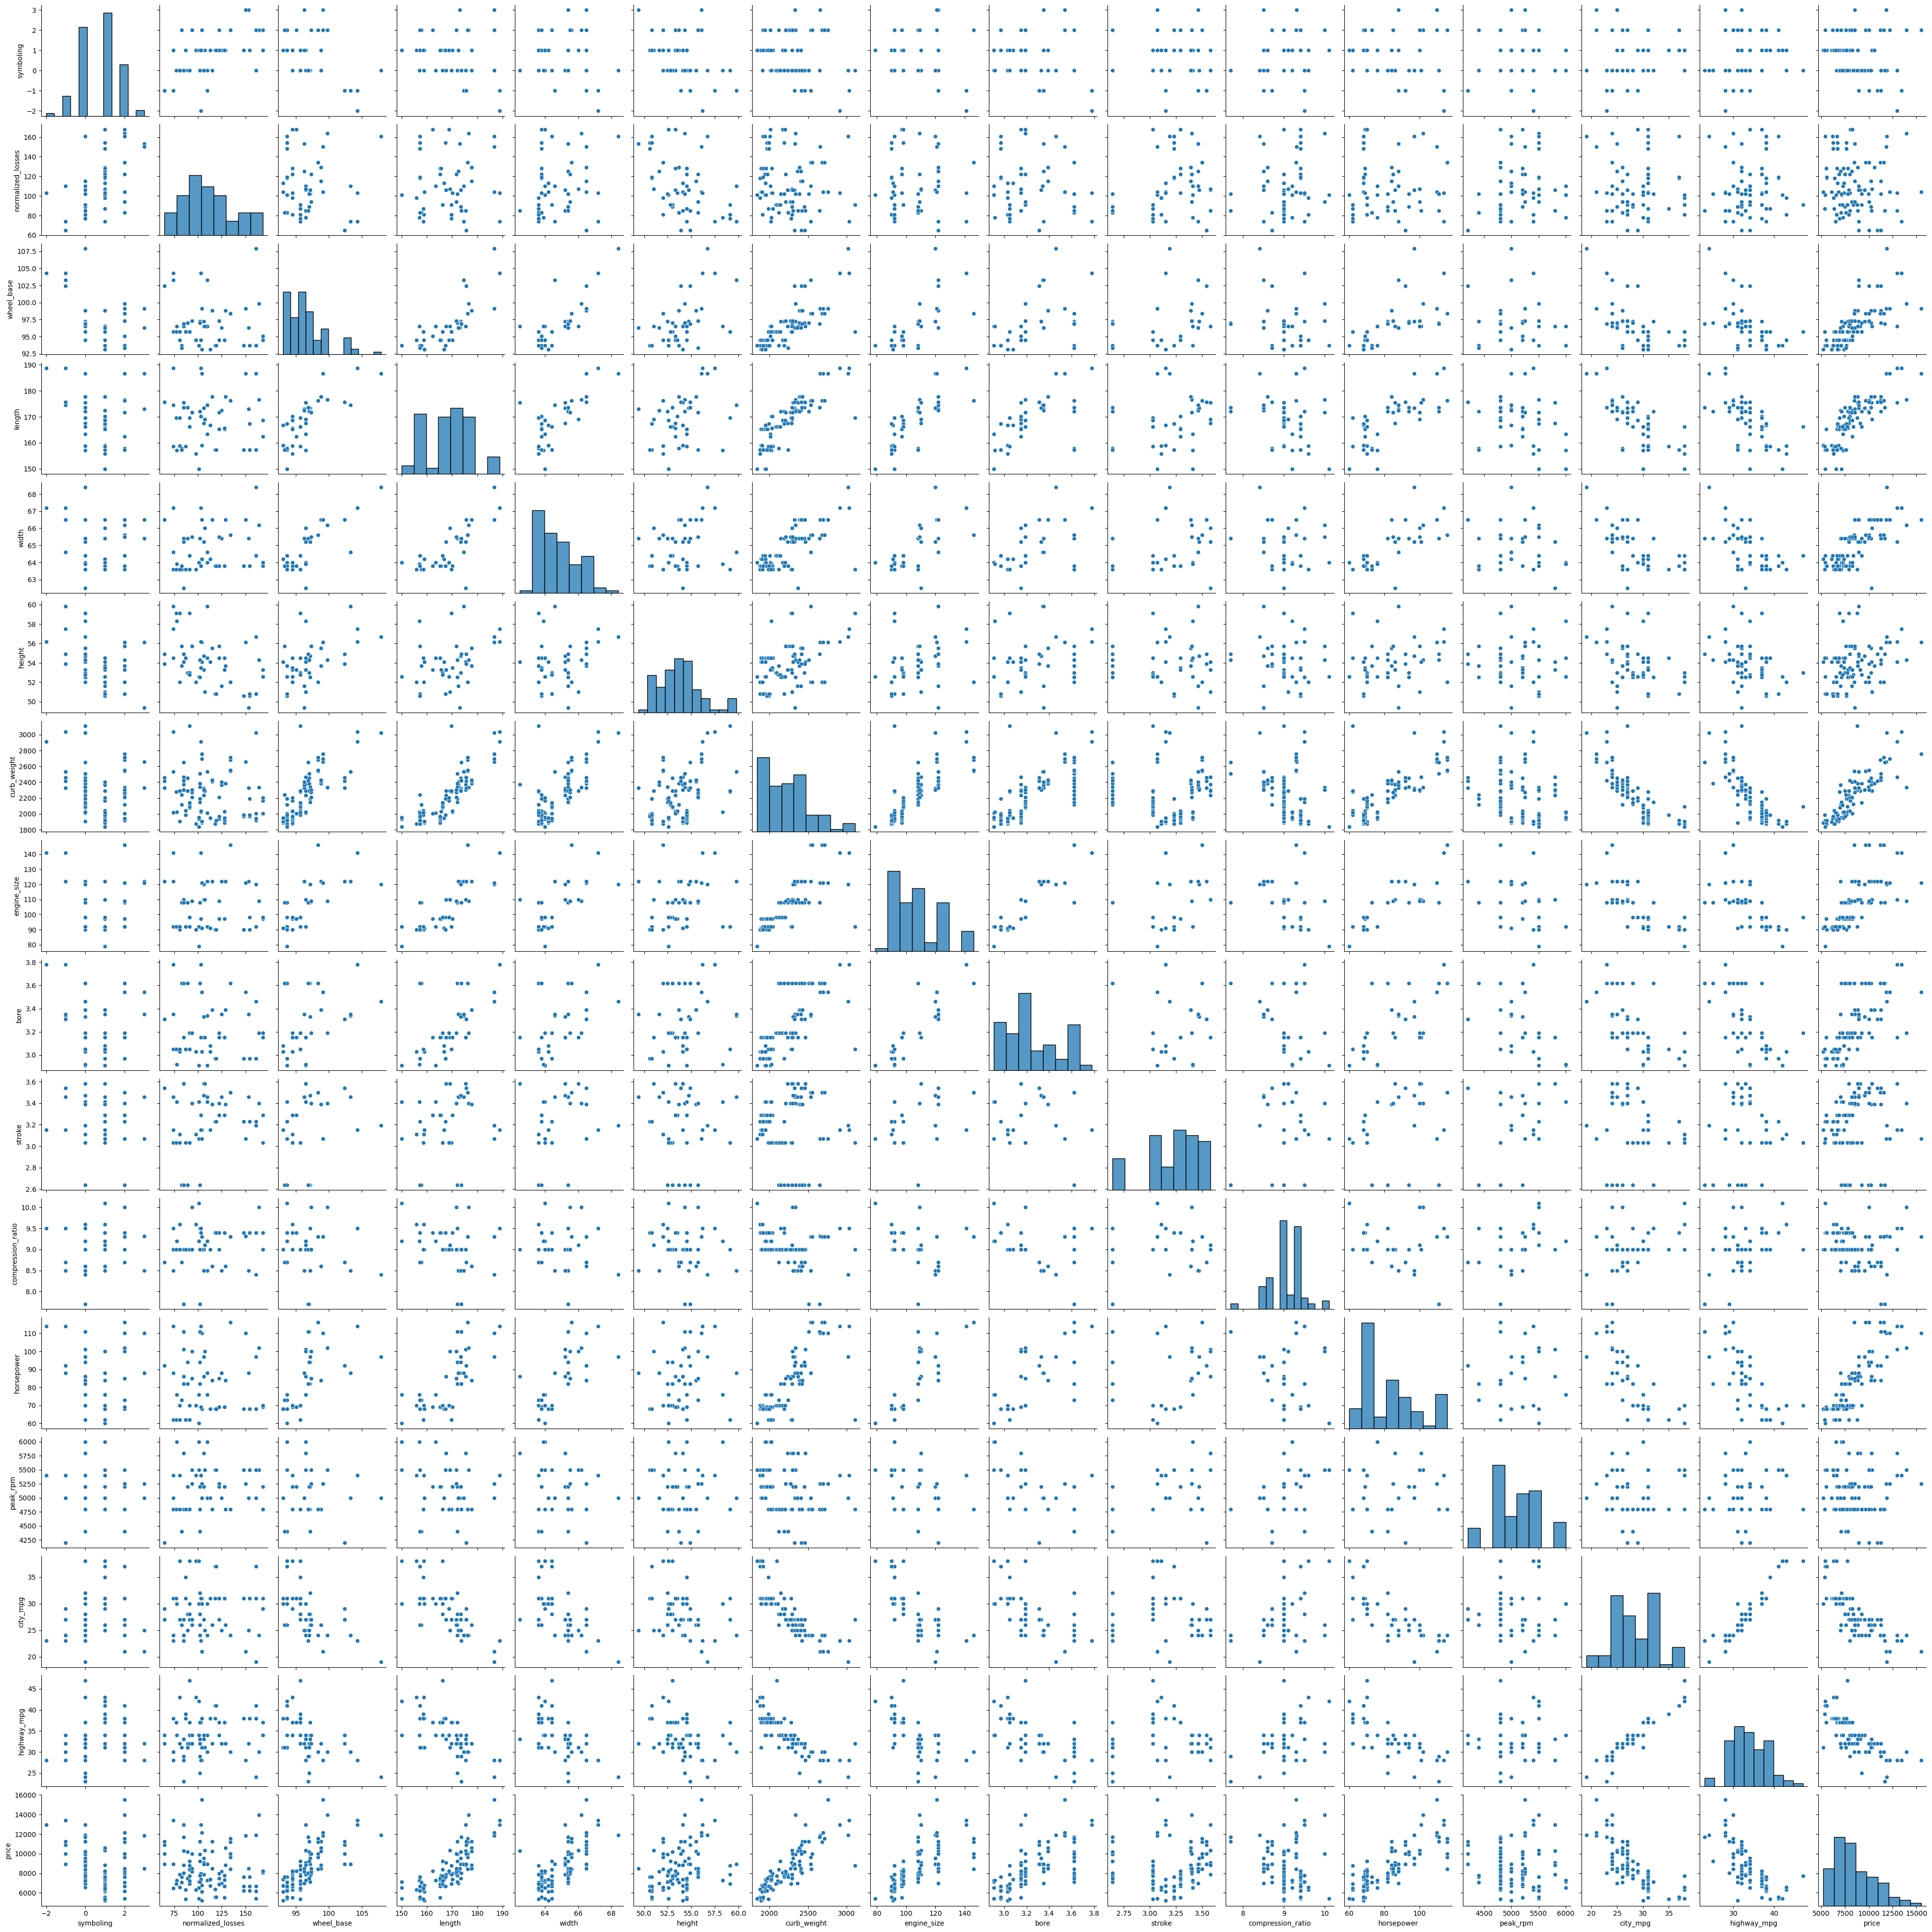

In [170]:
sns.pairplot(df)

### Step 8: Feature Encoding

In [172]:
from sklearn.preprocessing import LabelEncoder

# Step 8: Feature Encoding with Label Encoding
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of columns for Label Encoding
categorical_cols = ["make", "fuel_type", "aspiration", "num_doors", "body_style", "drive_wheels", "engine_location", "engine_type", "num_cylinders", "fuel_system"]

# Apply Label Encoding to the categorical columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Alternatively, you can store the encoded columns in a separate DataFrame if you want to compare the original and encoded versions.
# data_encoded = data.copy()

# After encoding, you can proceed with the rest of your steps as usual


In [173]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Categorical columns
categorical_cols = ["make", "fuel_type", "aspiration", "num_doors", 
                    "body_style", "drive_wheels", "engine_location", 
                    "engine_type", "num_cylinders", "fuel_system"]

# Identify numeric columns
numeric_cols = [col for col in df.columns if col not in categorical_cols]

# Define ColumnTransformer for OneHotEncoding
ohe = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
], remainder='passthrough')

# Apply transformation
df_encoded = ohe.fit_transform(df)

# Get feature names for encoded categorical columns
encoded_columns = ohe.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Combine encoded feature names and numeric column names
all_columns = list(encoded_columns) + numeric_cols

# Assign the correct column names to the transformed DataFrame
df_encoded = pd.DataFrame(df_encoded, columns=all_columns)

# Verify the new DataFrame
print("Transformed DataFrame:")
print(df_encoded.head())

# Check and recalculate correlations with 'price'
if 'price' in df_encoded.columns:
    correlation_matrix = df_encoded.corr()
    correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)
    print("Correlation with Price:")
    print(correlation_with_price)
else:
    print("'price' column not found. Please check the column names.")


Transformed DataFrame:
   make_1  make_2  make_3  make_4  make_5  make_6  make_7  make_8  make_9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   make_10  ...  curb_weight  engine_size  bore  stroke  compression_ratio  \
0      0.0  ...       2337.0        109.0  3.19    3.40              10.00   
1      0.0  ...       1874.0         90.0  3.03    3.11               9.60   
2      0.0  ...       1909.0         90.0  3.03    3.11               9.60   
3      0.0  ...       1876.0         90.0  2.97    3.23               9.41   
4      0.0  ...       1876.0         90.0  2.97    3.23               9.40   

   horsepower  peak_rpm  city_mpg  highway_mp

Strong Positive Correlations
1. Curb Weight
2. Length
3. Horsepower
4. Wheel Base
5. Engine Size


### Step 9: Feature Scaling

In [176]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop("price", axis=1))
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled["price"] = df["price"].values

### Step 10: Categorize the Target Variable

In [178]:
# For classification, binarize price (above or below median)
median_price = df_scaled["price"].median()
df_scaled["price_category"] = np.where(df_scaled["price"] > median_price, 1, 0)

### Step 11: Handle Imbalanced Data Using SMOTE

In [180]:
X = df_scaled.drop(["price", "price_category"], axis=1)
y = df_scaled["price_category"]
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

### Step 12: Train-Test Split

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [183]:
models = {
"Linear Regression": LinearRegression(),
"K Nearest Neighbors": KNeighborsClassifier(),
"Support Vector Machine": SVC(),
"Decision Tree": DecisionTreeClassifier(random_state=42),
"Random Forest": RandomForestClassifier(random_state=42)
}

### Step 13: Hyperparameter Tuning and Model Training

In [185]:
# Define parameter grids for hyperparameter tuning
param_grids = {
    "K Nearest Neighbors": {"n_neighbors": [3, 5, 7, 9]},
    "Support Vector Machine": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "Decision Tree": {"max_depth": [None, 10, 20, 30], "min_samples_split": [2, 5, 10]},
    "Random Forest": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20, 30]}
}
results = {}


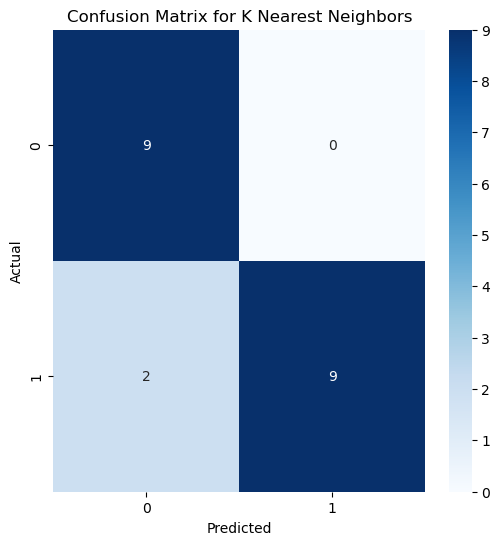

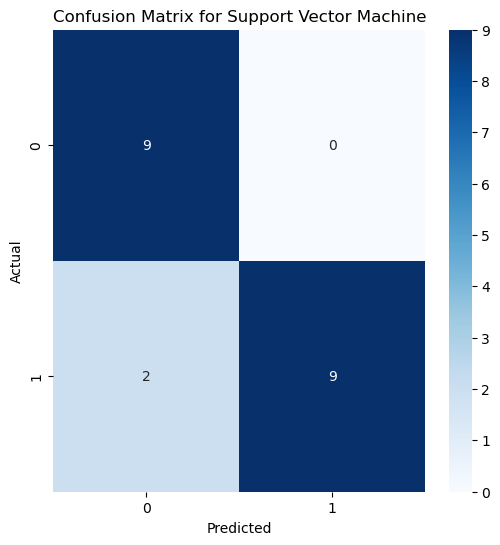

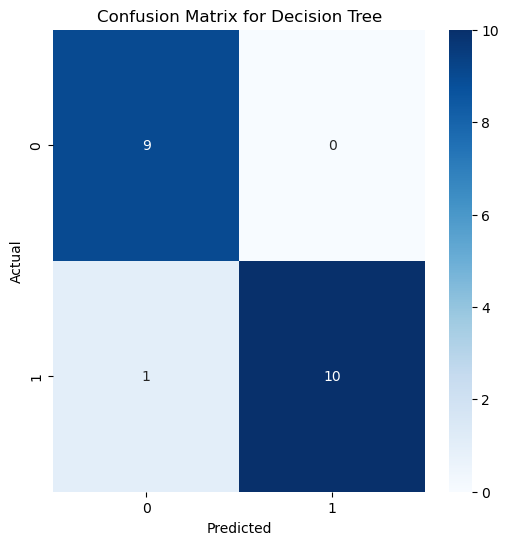

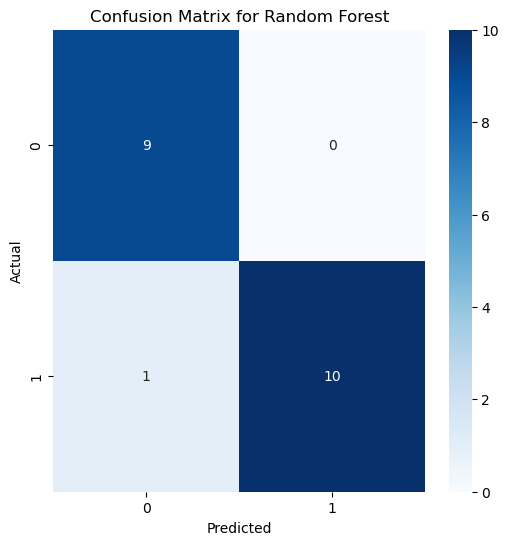

In [186]:
for model_name, model in models.items():
    if model_name in param_grids:
        grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring="accuracy")
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    if model_name == "Linear Regression":
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[model_name] = {
            "MSE": mse,
            "R2 Score": r2
        }
    else:
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        results[model_name] = {
            "Accuracy": accuracy,
            "Confusion Matrix": conf_matrix
        }

        # Display Confusion Matrix
        plt.figure(figsize=(6, 6))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
        plt.title(f"Confusion Matrix for {model_name}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

### Step 13: Model Training and Comparison

In [188]:
results = {}
for model_name, model in models.items():
    if model_name == "Linear Regression":
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[model_name] = {"MSE": mse, "R2 Score": r2}
    else:
        model.fit(X_train, y_train > y_train.median())  # Convert to classification
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test > y_test.median(), y_pred)
        results[model_name] = {"Accuracy": accuracy}


In [189]:
# ANN Model
ann = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
ann.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [190]:
y_pred_ann = (ann.predict(X_test) > 0.5).astype(int)
accuracy_ann = accuracy_score(y_test, y_pred_ann)
results["Artificial Neural Network"] = {"Accuracy": accuracy_ann}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


In [191]:
results_df = pd.DataFrame({k: v["Accuracy"] if "Accuracy" in v else v["R2 Score"] for k, v in results.items()}, index=["Accuracy" if "Accuracy" in v else "R2 Score" for v in results.values()]).T
print("Model Comparison:")
print(results_df)

Model Comparison:
                           R2 Score  Accuracy  Accuracy  Accuracy  Accuracy  \
Linear Regression          0.591569  0.591569  0.591569  0.591569  0.591569   
K Nearest Neighbors        0.600000  0.600000  0.600000  0.600000  0.600000   
Support Vector Machine     0.500000  0.500000  0.500000  0.500000  0.500000   
Decision Tree              0.500000  0.500000  0.500000  0.500000  0.500000   
Random Forest              0.500000  0.500000  0.500000  0.500000  0.500000   
Artificial Neural Network  0.950000  0.950000  0.950000  0.950000  0.950000   

                           Accuracy  
Linear Regression          0.591569  
K Nearest Neighbors        0.600000  
Support Vector Machine     0.500000  
Decision Tree              0.500000  
Random Forest              0.500000  
Artificial Neural Network  0.950000  


In [192]:
if "MSE" in results_df.columns:
    best_model_name = results_df["R2 Score"].idxmax()
else:
    best_model_name = results_df["Accuracy"].idxmax()
print(f"Best Model: {best_model_name}")

Best Model: Accuracy    Artificial Neural Network
Accuracy    Artificial Neural Network
Accuracy    Artificial Neural Network
Accuracy    Artificial Neural Network
Accuracy    Artificial Neural Network
dtype: object


## Conclusion

1. Dataset:
The dataset contains automobile specifications, performance metrics, and dimensions for predicting car prices.
Includes numerical and categorical features that require preprocessing (e.g., scaling, encoding).

2. Modeling:
Multiple algorithms are tested, including traditional models (Random Forest, Decision Tree, SVM) and deep learning (ANN).
ANN significantly outperforms other models in accuracy.

3. Preprocessing:
Effective preprocessing techniques like scaling, encoding, and handling class imbalance (using SMOTE) are applied.
These are critical for model performance, especially for algorithms sensitive to feature scaling.

4. Performance:
ANN likely benefits from its ability to capture complex, non-linear relationships in the data.
Traditional models may underperform due to insufficient feature engineering or hyperparameter tuning.


## Why ANN Works Well:

1. Flexibility with Non-Linear Relationships:
ANN can model complex interactions between features that traditional models might miss.

2. Feature Scaling:
Standardized input (via scaling) benefits ANN more than tree-based models, which are less sensitive to scaling.

3. Capacity to Learn:
With enough data and layers, ANN can effectively learn intricate patterns, which might be crucial in this dataset.

4. Deep Learning Optimizations:
Use of techniques like dropout, optimized activation functions, and adaptive optimizers (e.g., Adam) enhance ANN performance.
